# Ratios (%) of Particulate over Particulate + Dissolved (Colloidal) (Comparison with Sun et al., 2023)

In [1]:
import cmocean.cm as cm
import copy
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import matplotlib.gridspec as gridspec
import pandas as pd
from matplotlib.colors import LogNorm
from matplotlib.colors import ListedColormap

**From Sun et al., 2023**

Station S1 - Iona Island effluent plume

In [2]:
# 5 - Oct - 2013
depth_avg_S1 = [60, 60]
part_S1 = [17, 29]
S1_month = [10,10]

Station S3 - Inner Harbor of Burrard Inlet

In [3]:
# 5 - Dec - 2014
depth_avg_S3 = [15, 15]
part_S3 = [7, 7.4]
S3_month = [12,12]

Station S3b - Central Harbor of Burrard Inlet

In [4]:
# 16 - Dec - 2015 & 31 - Aug - 2016
depth_avg_S3b_0 = [25, 25]
part_S3b_0 = [51, 57]
#
depth_avg_S3b_1 = [19.5, 19.5]
part_S3b_1 = [5, 10]
#
S3b_0_month = [12,12]
S3b_1_month = [8,8]

Station FR - Fraser River

In [5]:
depth_avg_FR_0 = [5, 5]
part_FR_0 = [68, 88]
#
depth_avg_FR_1 = [3, 3]
part_FR_1 = [32, 39]
#
FR_0_month = [6,6]
FR_1_month = [2,2]

Station S2 - Southern SoG

In [6]:
# 11- Dec - 2013, 02 - Oct - 2014 & 15 - Dec - 2015
depth_avg_S2_0 = [50, 50, 50, 50]
part_S2_0 = [14, 15, 0.1, 0.5]
#
depth_avg_S2_1 = [60, 60]
part_S2_1 = [0.4, 2.3]
#
S2_0_month = [12,12,10,10]
S2_1_month = [12,12]

Station S4–1.5 - Southern SoG

In [7]:
depth_avg_S4_15_0 = [25, 25, 25, 25, 25, 25, 25, 25, 25, 25]
part_S4_15_0 = [0.2, 1.6, 0.2, 0.7, 0.9, 1.1, 2.5, 2.6, 0.4, 1.0]
#
depth_avg_S4_15_1 = [150, 150, 150, 150, 150, 150, 150, 150, 150, 150]
part_S4_15_1 = [0.2, 1.2, 2.0, 6.6, 1.1, 1.4, 0.1, 1.2, 0.4, 1.0]
#
S4_15_0_month = [2,2,5,5,9,9,4,4,8,8]
S4_15_1_month = [5,5,9,9,1,1,4,4,8,8]

Station NG - Northern SoG

In [8]:
depth_avg_NG_0 = [25, 25]
part_NG_0 = [5, 15]
#
depth_avg_NG_1 = [150, 150]
part_NG_1 = [11, 55]
#
NG_0_month = [8,8]
NG_1_month = [8,8]

In [9]:
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_updated_ratio_year_simulation.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_kernel_updated.zarr'
#filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_full_kernels_tau_0_025_ratio_0_2_sv_5.zarr'
filename = '/home/vvalenzuela/MOAD/Ocean_Parcels/results/Simulations_runs/PBDE_particles_for_0112022_run_365_days_full_kernels_tau_0_01_ratio_0_1_sv_5.zarr'
data = xr.open_dataset(filename)

/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'netcdf4' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)
/home/vvalenzuela/conda_envs/Parcels/lib/python3.11/site-packages/xarray/backends/plugins.py:159: RuntimeWarning: 'scipy' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [10]:
import Regions_functions_V2
from Regions_functions_V2 import vertical_mean_total_profiles, vertical_status_profiles, plot_vertical_total_state_profiles, plot_vertical_state_status, interpolate_volume_profile 

/tmp/ipykernel_1068981/2586272455.py:38: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)


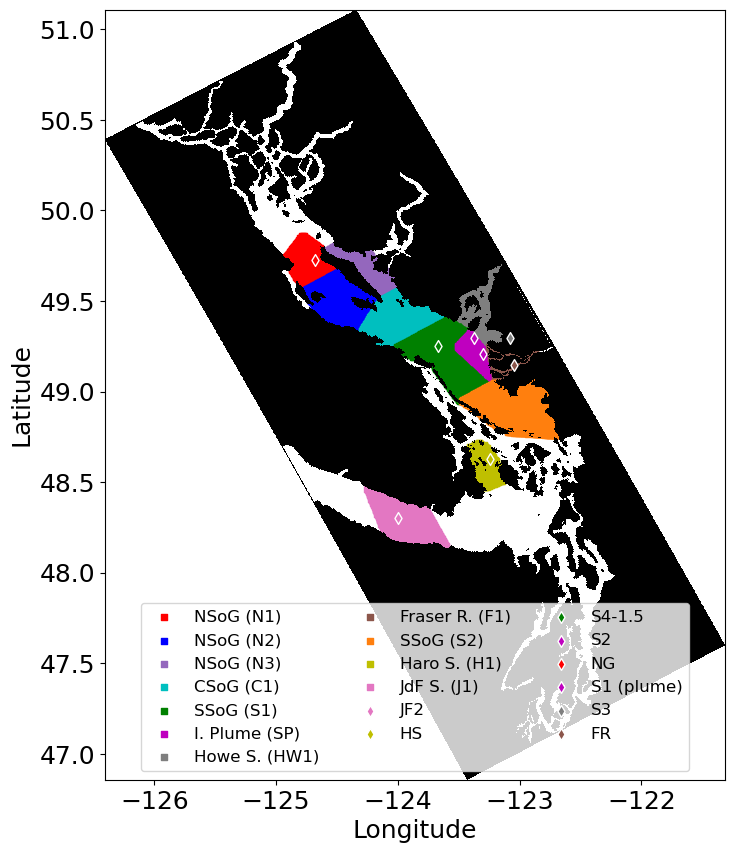

In [11]:
stations = ['JF2', 'HS', 'S4-1.5', 'S2', 'NG', 'S1 (plume)', 'S3', 'FR']
lat = np.array([48 + (18/60), 48 + (37.80/60) , 49 + (15/60) , 49 + (17.58/60) , 49 + (43.60/60), 49 + (12.32/60), 49 + (17.88/60), 49 + (08.66/60)])
lon = (-1) * np.array([124, 123 + (14.60/60), 123 + (40/60), 123 + (22.51/60), 124 + (40.80/60), 123 + (18/60), 123 + (04.91/60), 123 + (02.65/60)]) 
#############################################################################################
lon_NSoG_N1, lat_NSoG_N1 = Regions_functions_V2.lon_NSoG_N1, Regions_functions_V2.lat_NSoG_N1
lon_NSoG_N2, lat_NSoG_N2 = Regions_functions_V2.lon_NSoG_N2, Regions_functions_V2.lat_NSoG_N2
lon_NSoG_N3, lat_NSoG_N3 = Regions_functions_V2.lon_NSoG_N3, Regions_functions_V2.lat_NSoG_N3
lon_CSoG_C1, lat_CSoG_C1 = Regions_functions_V2.lon_CSoG_C1, Regions_functions_V2.lat_CSoG_C1
lon_SSoG_S1, lat_SSoG_S1 = Regions_functions_V2.lon_SSoG_S1, Regions_functions_V2.lat_SSoG_S1
lon_SSoG_SP, lat_SSoG_SP = Regions_functions_V2.lon_SSoG_SP, Regions_functions_V2.lat_SSoG_SP
lon_SSoG_S2, lat_SSoG_S2 = Regions_functions_V2.lon_SSoG_S2, Regions_functions_V2.lat_SSoG_S2
lon_Haro_H1, lat_Haro_H1 = Regions_functions_V2.lon_Haro_H1, Regions_functions_V2.lat_Haro_H1
lon_Juan_J1, lat_Juan_J1 = Regions_functions_V2.lon_Juan_J1, Regions_functions_V2.lat_Juan_J1
lon_Fraser_F1, lat_Fraser_F1 = Regions_functions_V2.lon_Fraser_F1, Regions_functions_V2.lat_Fraser_F1
lon_Howe_HW1, lat_Howe_HW1 = Regions_functions_V2.lon_Howe_HW1, Regions_functions_V2.lat_Howe_HW1
#########
colors_regions = ['r', 'b', 'tab:purple', 'c', 'g','m', 'tab:gray','tab:brown', 'tab:orange', 'y', 'tab:pink']
regions = ['NSoG (N1)', 'NSoG (N2)',  'NSoG (N3)', 'CSoG (C1)', 'SSoG (S1)', 'I. Plume (SP)', 'Howe S. (HW1)', 'Fraser R. (F1)', 'SSoG (S2)', 'Haro S. (H1)', 'JdF S. (J1)']
coords = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')
bathy = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/bathymetry_202108.nc')
colors = [(0, 0, 0, 1),  # Black for land (1)
          (0, 0, 0, 0)]  # Transparent for water (0)
cmap = ListedColormap(colors)
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize = (8,10))
ax.scatter(lon_NSoG_N1, lat_NSoG_N1, c = colors_regions[0], s = 20, marker = 's', label=regions[0])
ax.scatter(lon_NSoG_N2, lat_NSoG_N2, c = colors_regions[1],s = 20,  marker = 's', label=regions[1])
ax.scatter(lon_NSoG_N3, lat_NSoG_N3, c = colors_regions[2],s = 20,  marker = 's', label=regions[2])
ax.scatter(lon_CSoG_C1, lat_CSoG_C1, c = colors_regions[3],s = 20, marker = 's', label=regions[3])
ax.scatter(lon_SSoG_S1, lat_SSoG_S1, c = colors_regions[4],s = 20, marker = 's', label=regions[4])
ax.scatter(lon_SSoG_SP, lat_SSoG_SP, c = colors_regions[5],s = 20, marker = 's', label=regions[5])
ax.scatter(lon_Howe_HW1, lat_Howe_HW1,c = colors_regions[6], s = 20, marker = 's', label=regions[6])
ax.scatter(lon_Fraser_F1, lat_Fraser_F1, c = colors_regions[7], s = 20, marker = 's',label=regions[7])
ax.scatter(lon_SSoG_S2, lat_SSoG_S2,c = colors_regions[8], s = 20 ,marker = 's', label=regions[8])
ax.scatter(lon_Haro_H1, lat_Haro_H1,c = colors_regions[9],s = 20,marker = 's', label=regions[9])
ax.scatter(lon_Juan_J1, lat_Juan_J1, c = colors_regions[10],s = 20,marker = 's', label=regions[10])
ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
#
color_stations = ['tab:pink', 'y', 'g','m', 'r','m', 'tab:gray', 'tab:brown']
for i in range(len(stations)):
    ax.scatter(lon[i], lat[i], marker = 'd', edgecolors='w', c = color_stations[i], label = stations[i])
#    
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
#
#
ax.legend(loc = 'lower center', fontsize = 12, ncol = 3)

/tmp/ipykernel_1068981/2372188921.py:15: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)


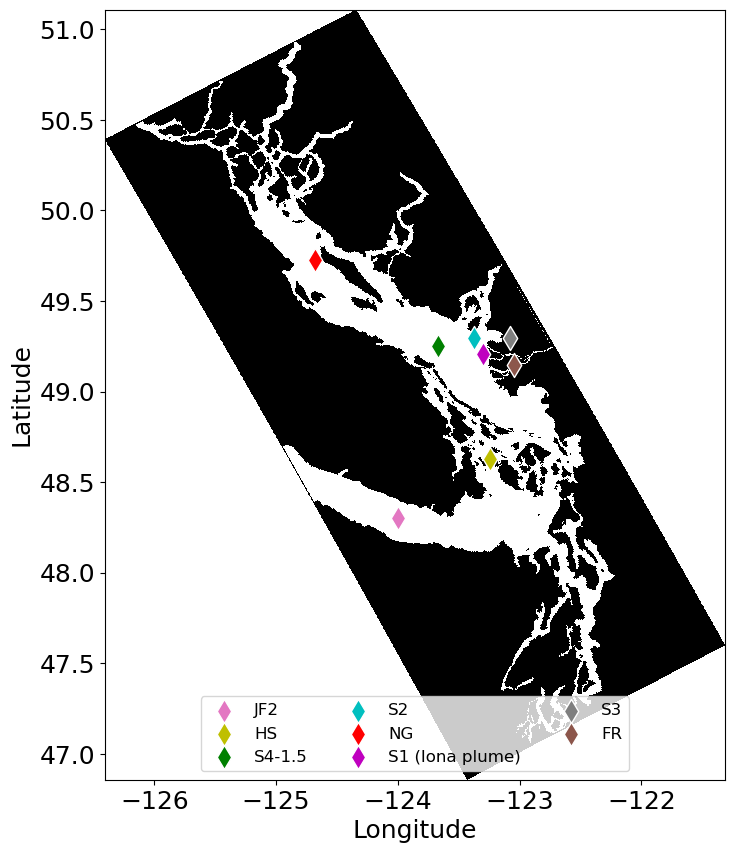

In [12]:
stations = ['JF2', 'HS', 'S4-1.5', 'S2', 'NG', 'S1 (Iona plume)', 'S3', 'FR']
lat = np.array([48 + (18/60), 48 + (37.80/60) , 49 + (15/60) , 49 + (17.58/60) , 49 + (43.60/60), 49 + (12.32/60), 49 + (17.88/60), 49 + (08.66/60)])
lon = (-1) * np.array([124, 123 + (14.60/60), 123 + (40/60), 123 + (22.51/60), 124 + (40.80/60), 123 + (18/60), 123 + (04.91/60), 123 + (02.65/60)]) 
#############################################################################################

#########
coords = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid2/mesh_mask202108_TDV.nc')
bathy = xr.open_dataset('/ocean/vvalenzuela/MOAD/grid/bathymetry_202108.nc')
colors = [(0, 0, 0, 1),  # Black for land (1)
          (0, 0, 0, 0)]  # Transparent for water (0)
cmap = ListedColormap(colors)
plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(figsize = (8,10))
ax.pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
#
color_stations = ['tab:pink', 'y', 'g','c', 'r','m', 'tab:gray', 'tab:brown']
for i in range(len(stations)):
    ax.scatter(lon[i], lat[i], marker = 'd', edgecolors='w', s = 150, c = color_stations[i], label = stations[i])
#    
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
#
#
ax.legend(loc = 'lower center', fontsize = 12, ncol = 3)

In [13]:
polygon_dict = Regions_functions_V2.polygon_definition(filename, time_step = 'day')
volumes_regions_depths = Regions_functions_V2.volume_by_depth_all_regions(polygon_dict)

In [14]:
depth_bins_regions = 81
#####
volume_N1, depths_N1 = interpolate_volume_profile(volumes_regions_depths['N1'], depth_bins_regions)
volume_N2, depths_N2 = interpolate_volume_profile(volumes_regions_depths['N2'], depth_bins_regions)
volume_N3, depths_N3 = interpolate_volume_profile(volumes_regions_depths['N3'], depth_bins_regions)
volume_C1, depths_C1 = interpolate_volume_profile(volumes_regions_depths['C1'], depth_bins_regions)
volume_S1, depths_S1 = interpolate_volume_profile(volumes_regions_depths['S1'], depth_bins_regions)
volume_SP, depths_SP = interpolate_volume_profile(volumes_regions_depths['SP'], depth_bins_regions)
volume_HW1, depths_HW1 = interpolate_volume_profile(volumes_regions_depths['HW1'], depth_bins_regions)
volume_F1, depths_F1 = interpolate_volume_profile(volumes_regions_depths['F1'], depth_bins_regions)
volume_S2, depths_S2 = interpolate_volume_profile(volumes_regions_depths['S2'], depth_bins_regions)
volume_H1, depths_H1 = interpolate_volume_profile(volumes_regions_depths['H1'], depth_bins_regions)
volume_J1, depths_J1 = interpolate_volume_profile(volumes_regions_depths['J1'], depth_bins_regions)

In [15]:
status_vertical_N1 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['N1'], depth_bin_edges=depths_N1)
status_vertical_N2 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['N2'], depth_bin_edges=depths_N2)
status_vertical_N3 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['N3'], depth_bin_edges=depths_N3)
status_vertical_C1 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['C1'], depth_bin_edges=depths_C1)
status_vertical_S1 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['S1'], depth_bin_edges=depths_S1)
status_vertical_SP = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['SP'], depth_bin_edges=depths_SP)
status_vertical_HW1 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['HW1'], depth_bin_edges=depths_HW1)
status_vertical_F1 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['F1'], depth_bin_edges=depths_F1)
status_vertical_S2 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['S2'], depth_bin_edges=depths_S2)
status_vertical_H1 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['H1'], depth_bin_edges=depths_H1)
status_vertical_J1 = Regions_functions_V2.vertical_status_profiles_V2(polygon_dict['J1'], depth_bin_edges=depths_J1)

In [16]:
plt.rcParams.update({'font.size': 13})

In [17]:
from matplotlib.colors import BoundaryNorm
from matplotlib.colorbar import ColorbarBase
color_meses = cm.amp
bounds = np.arange(1, 14)  # 1-12 inclusive, upper bound is exclusive
norm = BoundaryNorm(boundaries=bounds, ncolors=color_meses.N)

/tmp/ipykernel_1068981/3242530412.py:97: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax[2].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)


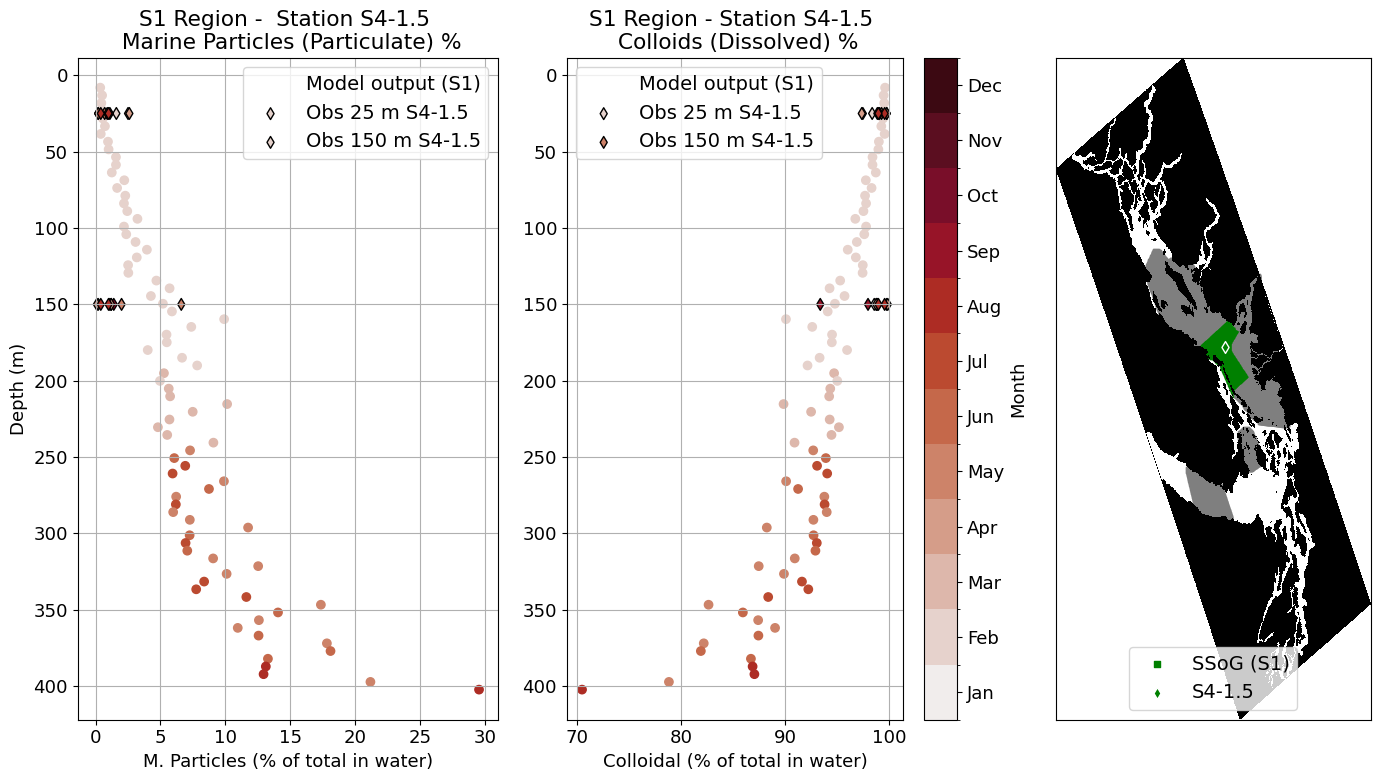

In [18]:
# model status ratio (status 3 / (status 2 + status 3))
numerator = status_vertical_S1['Particles Status 3'].astype(float)
denominator = (status_vertical_S1['Particles Status 3'] + status_vertical_S1['Particles Status 2'] + status_vertical_S1['Particles Status 1']).astype(float)

# Mask out where numerator or denominator is 0
status_ratio_S1 = (numerator / denominator).mask((numerator == 0) | (denominator == 0))

# ------------------------
# (S4_15_1)
depth_deep = depth_avg_S4_15_1[0]
#mean_deep = np.mean(part_S4_15_1)
#std_deep = np.std(part_S4_15_1)
#min_deep = np.min(part_S4_15_1)
#max_deep = np.max(part_S4_15_1)

# (S4_15_0)
depth_shallow = depth_avg_S4_15_0[0]
#mean_shallow = np.mean(part_S4_15_0)
#std_shallow = np.std(part_S4_15_0)
#min_shallow = np.min(part_S4_15_0)
#max_shallow = np.max(part_S4_15_0)

# ----------------------------------
fig, ax = plt.subplots(1, 3, figsize=(14, 8), gridspec_kw={'width_ratios': [2, 2, 1.5]})

# --------------------------------
S4_15_plot = ax[0].scatter(status_ratio_S1 * 100, status_vertical_S1['Avg. Depth'], c=status_vertical_S1['Mode Month']
                           , cmap = color_meses, label='Model output (S1)', norm=norm)
cbar = plt.colorbar(S4_15_plot, ax = ax[1], label = 'Month')
cbar.set_ticks(np.arange(1.5, 13.5, 1))
cbar.set_ticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

ax[0].scatter(part_S4_15_0, depth_avg_S4_15_0, c=S4_15_0_month, cmap = color_meses, vmin=1, vmax=12, marker = 'd', edgecolor = 'k', label=f'Obs {depth_shallow} m S4-1.5')
ax[0].scatter(part_S4_15_1, depth_avg_S4_15_1, c=S4_15_0_month, cmap = color_meses, vmin=1, vmax=12, marker = 'd', edgecolor = 'k', label=f'Obs {depth_deep} m S4-1.5')

#ax[0].errorbar(mean_shallow, depth_shallow, xerr=std_shallow, fmt='d', color='darkgreen', capsize=5, label=f'{depth_shallow} m mean ± std')
#ax[0].errorbar(mean_deep, depth_deep, xerr=std_deep, fmt='d', color='darkblue', capsize=5, label=f'{depth_deep} m mean ± std')

#ax[0].plot([min_shallow, max_shallow], [depth_shallow, depth_shallow], color='limegreen', linewidth=2, label=f'{depth_shallow} m min–max')
#ax[0].plot([min_deep, max_deep], [depth_deep, depth_deep], color='dodgerblue', linewidth=2, label=f'{depth_deep} m min–max')

ax[0].invert_yaxis()
ax[0].set_xlabel('M. Particles (% of total in water)')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title('S1 Region -  Station S4-1.5 \n Marine Particles (Particulate) %')
ax[0].grid(True)
ax[0].legend(loc='best', fontsize = 14)

# ---------------- Right Panel: 100 - Particulate % ----------------
part_S4_15_0_comp = [100 - v for v in part_S4_15_0]
part_S4_15_1_comp = [100 - v for v in part_S4_15_1]
#mean_shallow_comp = 100 - mean_shallow
#mean_deep_comp = 100 - mean_deep
#min_shallow_comp = 100 - max_shallow  # flip max/min for complementary
#max_shallow_comp = 100 - min_shallow
#min_deep_comp = 100 - max_deep
#max_deep_comp = 100 - min_deep
status_ratio_S1_comp = 100 - (status_ratio_S1 * 100)

# Model 
ax[1].scatter(status_ratio_S1_comp, status_vertical_S1['Avg. Depth'], c=status_vertical_S1['Mode Month']
              , cmap = color_meses, label='Model output (S1)', norm=norm)


# Observations
ax[1].scatter(part_S4_15_0_comp, depth_avg_S4_15_0, c=S4_15_0_month, cmap = color_meses, vmin=1, vmax=12, marker = 'd', edgecolor = 'k', label=f'Obs {depth_shallow} m S4-1.5')
ax[1].scatter(part_S4_15_1_comp, depth_avg_S4_15_1, c=S4_15_1_month, cmap = color_meses, vmin=1, vmax=12, marker = 'd', edgecolor = 'k', label=f'Obs {depth_deep} m S4-1.5')

# Mean ± std
#ax[1].errorbar(mean_shallow_comp, depth_shallow, xerr=std_shallow, fmt='d', color='green', capsize=5, label=f'{depth_shallow} m mean ± std')
#ax[1].errorbar(mean_deep_comp, depth_deep, xerr=std_deep, fmt='d', color='blue', capsize=5, label=f'{depth_deep} m mean ± std')

# Min–max bars
#ax[1].plot([min_shallow_comp, max_shallow_comp], [depth_shallow, depth_shallow], color='green', linewidth=2, label=f'{depth_shallow} m min–max')
#ax[1].plot([min_deep_comp, max_deep_comp], [depth_deep, depth_deep], color='blue', linewidth=2, label=f'{depth_deep} m min–max')

# Formatting
ax[1].invert_yaxis()
ax[1].set_xlabel('Colloidal (% of total in water)')
ax[1].set_title('S1 Region - Station S4-1.5 \n Colloids (Dissolved) %')
ax[1].grid(True)
ax[1].legend(loc='best', fontsize = 14)
#
# Map
ax[2].scatter(lon_NSoG_N1, lat_NSoG_N1, c = colors_regions[6], s = 20, marker = 's')
ax[2].scatter(lon_NSoG_N2, lat_NSoG_N2, c = colors_regions[6],s = 20,  marker = 's')
ax[2].scatter(lon_NSoG_N3, lat_NSoG_N3, c = colors_regions[6],s = 20,  marker = 's')
ax[2].scatter(lon_CSoG_C1, lat_CSoG_C1, c = colors_regions[6],s = 20, marker = 's')
ax[2].scatter(lon_SSoG_S1, lat_SSoG_S1, c = colors_regions[4],s = 20, marker = 's', label=regions[4])
ax[2].scatter(lon_SSoG_SP, lat_SSoG_SP, c = colors_regions[6],s = 20, marker = 's')
ax[2].scatter(lon_Howe_HW1, lat_Howe_HW1,c = colors_regions[6], s = 20, marker = 's')
ax[2].scatter(lon_Fraser_F1, lat_Fraser_F1, c = colors_regions[6], s = 20, marker = 's')
ax[2].scatter(lon_SSoG_S2, lat_SSoG_S2,c = colors_regions[6], s = 20 ,marker = 's')
ax[2].scatter(lon_Haro_H1, lat_Haro_H1,c = colors_regions[6],s = 20,marker = 's')
ax[2].scatter(lon_Juan_J1, lat_Juan_J1, c = colors_regions[6],s = 20,marker = 's')
ax[2].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax[2].scatter(lon[2], lat[2], marker = 'd', edgecolors='w', c = color_stations[2], label = stations[2])
ax[2].legend(loc = 'lower center', fontsize = 14)
ax[2].tick_params(which='both', bottom=False, top=False, left=False, right=False,
        labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()





/tmp/ipykernel_1068981/2508162334.py:93: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax[2].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)


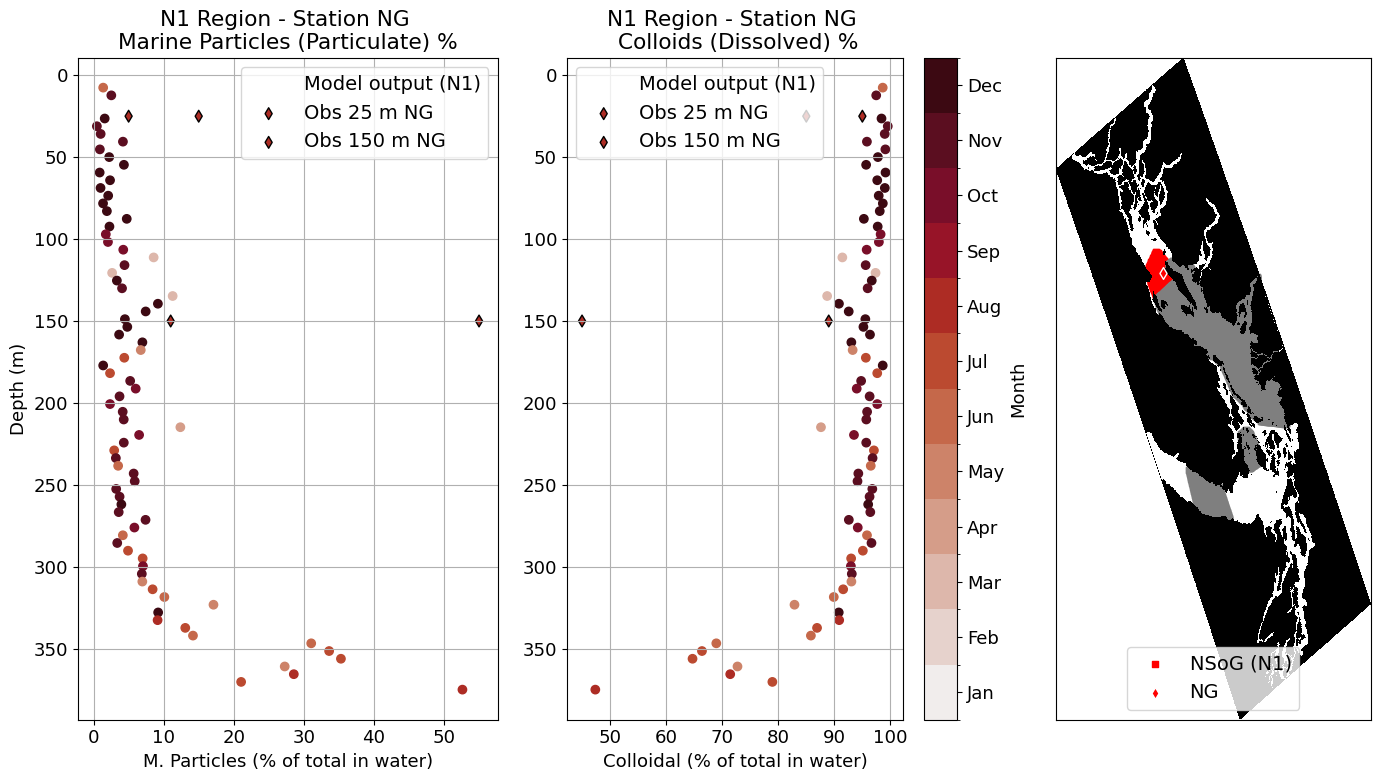

In [19]:

# model status ratio for N1
numerator = status_vertical_N1['Particles Status 3'].astype(float)
denominator = (status_vertical_N1['Particles Status 3'] + status_vertical_N1['Particles Status 2'] + status_vertical_N1['Particles Status 1']).astype(float)
status_ratio_N1 = (numerator / denominator).mask((numerator == 0) | (denominator == 0))

# ------------------------
# (NG_1)
depth_deep = depth_avg_NG_1[0]
#mean_deep = np.mean(part_NG_1)
#std_deep = np.std(part_NG_1)
#min_deep = np.min(part_NG_1)
#max_deep = np.max(part_NG_1)

# (NG_0)
depth_shallow = depth_avg_NG_0[0]
#mean_shallow = np.mean(part_NG_0)
#std_shallow = np.std(part_NG_0)
#min_shallow = np.min(part_NG_0)
#max_shallow = np.max(part_NG_0)

# ----------------------------------
# Create figure with 2 subplots
fig, ax = plt.subplots(1, 3, figsize=(14, 8), gridspec_kw={'width_ratios': [2, 2, 1.5]})

# ---------------- ----------------
NG_plot = ax[0].scatter(status_ratio_N1 * 100, status_vertical_N1['Avg. Depth'], c=status_vertical_N1['Mode Month']
              , cmap = color_meses, label='Model output (N1)', norm=norm)
cbar = plt.colorbar(NG_plot, ax = ax[1], label = 'Month')
cbar.set_ticks(np.arange(1.5, 13.5, 1))
cbar.set_ticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax[0].scatter(part_NG_0, depth_avg_NG_0, c=NG_0_month, cmap = color_meses, vmin=1, vmax=12, marker = 'd', edgecolor = 'k', label=f'Obs {depth_shallow} m NG')
ax[0].scatter(part_NG_1, depth_avg_NG_1, c=NG_1_month, cmap = color_meses, vmin=1, vmax=12, marker = 'd', edgecolor = 'k', label=f'Obs {depth_deep} m NG')

#ax[0].errorbar(mean_shallow, depth_shallow, xerr=std_shallow, fmt='d', color='darkgreen', capsize=5, label=f'{depth_shallow} m mean ± std')
#ax[0].errorbar(mean_deep, depth_deep, xerr=std_deep, fmt='d', color='darkblue', capsize=5, label=f'{depth_deep} m mean ± std')

#ax[0].plot([min_shallow, max_shallow], [depth_shallow, depth_shallow], color='limegreen', linewidth=2, label=f'{depth_shallow} m min–max')
#ax[0].plot([min_deep, max_deep], [depth_deep, depth_deep], color='dodgerblue', linewidth=2, label=f'{depth_deep} m min–max')

ax[0].invert_yaxis()
ax[0].set_xlabel('M. Particles (% of total in water)')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title('N1 Region - Station NG \nMarine Particles (Particulate) %')
ax[0].grid(True)
ax[0].legend(loc='best', fontsize = 14)

# --------------------------------
part_NG_0_comp = [100 - v for v in part_NG_0]
part_NG_1_comp = [100 - v for v in part_NG_1]
#mean_shallow_comp = 100 - mean_shallow
#mean_deep_comp = 100 - mean_deep
#min_shallow_comp = 100 - max_shallow
#max_shallow_comp = 100 - min_shallow
#min_deep_comp = 100 - max_deep
#max_deep_comp = 100 - min_deep
status_ratio_N1_comp = 100 - (status_ratio_N1 * 100)

# Model 
ax[1].scatter(status_ratio_N1_comp, status_vertical_N1['Avg. Depth'], c=status_vertical_N1['Mode Month']
              , cmap = color_meses, label='Model output (N1)', norm=norm)

# Obs 
ax[1].scatter(part_NG_0_comp, depth_avg_NG_0, c=NG_0_month, cmap = color_meses, vmin=1, vmax=12, marker = 'd', edgecolor = 'k', label=f'Obs {depth_shallow} m NG')
ax[1].scatter(part_NG_1_comp, depth_avg_NG_1, c=NG_1_month, cmap = color_meses, vmin=1, vmax=12, marker = 'd', edgecolor = 'k', label=f'Obs {depth_deep} m NG')

# Mean ± std
#ax[1].errorbar(mean_shallow_comp, depth_shallow, xerr=std_shallow, fmt='d', color='green', capsize=5, label=f'{depth_shallow} m mean ± std')
#ax[1].errorbar(mean_deep_comp, depth_deep, xerr=std_deep, fmt='d', color='blue', capsize=5, label=f'{depth_deep} m mean ± std')

# Min–max bars
#ax[1].plot([min_shallow_comp, max_shallow_comp], [depth_shallow, depth_shallow], color='green', linewidth=2, label=f'{depth_shallow} m min–max')
#ax[1].plot([min_deep_comp, max_deep_comp], [depth_deep, depth_deep], color='blue', linewidth=2, label=f'{depth_deep} m min–max')

ax[1].invert_yaxis()
ax[1].set_xlabel('Colloidal (% of total in water)')
ax[1].set_title('N1 Region - Station NG \n Colloids (Dissolved) %')
ax[1].grid(True)
ax[1].legend(loc='best', fontsize = 14)
#
# Map
ax[2].scatter(lon_NSoG_N1, lat_NSoG_N1, c = colors_regions[0], s = 20, marker = 's', label=regions[0])
ax[2].scatter(lon_NSoG_N2, lat_NSoG_N2, c = colors_regions[6],s = 20,  marker = 's')
ax[2].scatter(lon_NSoG_N3, lat_NSoG_N3, c = colors_regions[6],s = 20,  marker = 's')
ax[2].scatter(lon_CSoG_C1, lat_CSoG_C1, c = colors_regions[6],s = 20, marker = 's')
ax[2].scatter(lon_SSoG_S1, lat_SSoG_S1, c = colors_regions[6],s = 20, marker = 's')
ax[2].scatter(lon_SSoG_SP, lat_SSoG_SP, c = colors_regions[6],s = 20, marker = 's')
ax[2].scatter(lon_Howe_HW1, lat_Howe_HW1,c = colors_regions[6], s = 20, marker = 's')
ax[2].scatter(lon_Fraser_F1, lat_Fraser_F1, c = colors_regions[6], s = 20, marker = 's')
ax[2].scatter(lon_SSoG_S2, lat_SSoG_S2,c = colors_regions[6], s = 20 ,marker = 's')
ax[2].scatter(lon_Haro_H1, lat_Haro_H1,c = colors_regions[6],s = 20,marker = 's')
ax[2].scatter(lon_Juan_J1, lat_Juan_J1, c = colors_regions[6],s = 20,marker = 's')
ax[2].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax[2].scatter(lon[4], lat[4], marker = 'd', edgecolors='w', c = color_stations[4], label = stations[4])
ax[2].legend(loc = 'lower center', fontsize = 14)
ax[2].tick_params(which='both', bottom=False, top=False, left=False, right=False,
        labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()


/tmp/ipykernel_1068981/1988822811.py:102: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax[2].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)


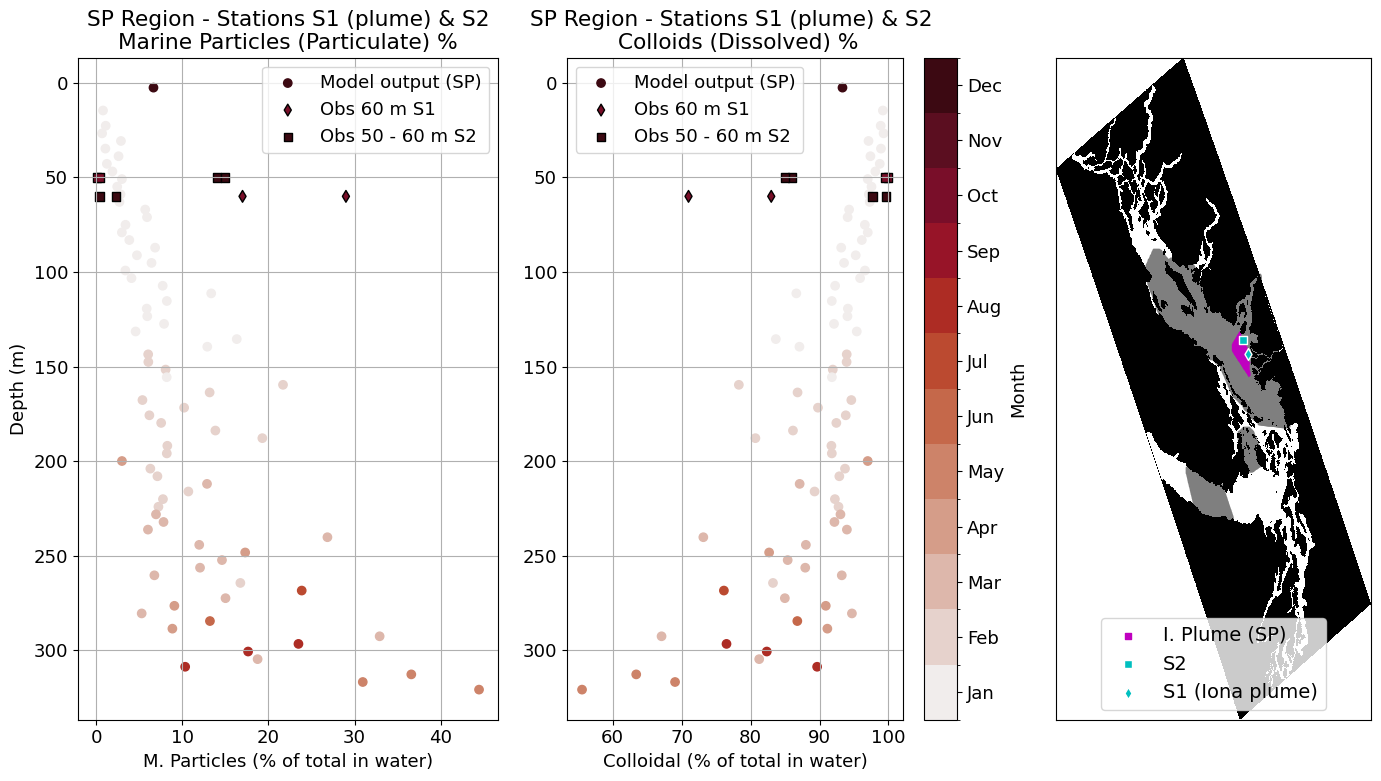

In [20]:
# model status ratio for SP
numerator = status_vertical_SP['Particles Status 3'].astype(float)
denominator = (status_vertical_SP['Particles Status 3'] + status_vertical_SP['Particles Status 2'] + status_vertical_SP['Particles Status 1']).astype(float)
status_ratio_SP = (numerator / denominator).mask((numerator == 0) | (denominator == 0))

# ------------------------
# S1 
depth_S1 = depth_avg_S1
part_S1 = part_S1
#mean_S1 = np.mean(part_S1)
#std_S1 = np.std(part_S1)
#min_S1 = np.min(part_S1)
#max_S1 = np.max(part_S1)

# S2 
depth_S2 = depth_avg_S2_0 + depth_avg_S2_1
part_S2 = part_S2_0 + part_S2_1
months_S2 = S2_0_month + S2_1_month
#mean_S2 = np.mean(part_S2)
#std_S2 = np.std(part_S2)
#min_S2 = np.min(part_S2)
#max_S2 = np.max(part_S2)

# ------------------------
fig, ax = plt.subplots(1, 3, figsize=(14, 8), gridspec_kw={'width_ratios': [2, 2, 1.5]})

# --------------------------------
SP_plot = ax[0].scatter(status_ratio_SP * 100, status_vertical_SP['Avg. Depth'], c=status_vertical_SP['Mode Month']
              , cmap = color_meses, label='Model output (SP)', norm=norm)
cbar = plt.colorbar(SP_plot, ax = ax[1], label = 'Month')
cbar.set_ticks(np.arange(1.5, 13.5, 1))
cbar.set_ticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                     'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])# S1 observations
ax[0].scatter(part_S1, depth_S1, c=S1_month, cmap = color_meses, vmin=1, vmax=12, marker='d', edgecolor = 'k', label=f'Obs {depth_S1[0]} m S1')
ax[0].scatter(part_S2, depth_S2, c=months_S2, cmap = color_meses, vmin=1, vmax=12, marker='s', edgecolor = 'k', label=f'Obs {depth_S2[0]} - {depth_S2[-1]} m S2')

#ax[0].errorbar(mean_S1, np.mean(depth_S1), xerr=std_S1, fmt='d', color='crimson', capsize=5, label='S1 mean ± std')
#ax[0].plot([min_S1, max_S1], [np.mean(depth_S1)]*2, color='crimson', linewidth=2, linestyle='--', label='S1 min–max')

# S2 observations
#ax[0].errorbar(mean_S2, np.mean(depth_S2), xerr=std_S2, fmt='d', color='teal', capsize=5, label='S2 mean ± std')
#ax[0].plot([min_S2, max_S2], [np.mean(depth_S2)]*2, color='teal', linewidth=2, linestyle='--', label='S2 min–max')

# Axis settings
ax[0].invert_yaxis()
ax[0].set_xlabel('M. Particles (% of total in water)')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title('SP Region - Stations S1 (plume) & S2\nMarine Particles (Particulate) %')
ax[0].grid(True)
ax[0].legend(loc='best')

# --------------------------------
# Model
status_ratio_SP_comp = 100 - (status_ratio_SP * 100)

# S1 
part_S1_comp = [100 - p for p in part_S1]
#mean_S1_comp = 100 - mean_S1
#min_S1_comp = 100 - max_S1
#max_S1_comp = 100 - min_S1

# S2 
part_S2_comp = [100 - p for p in part_S2]
#mean_S2_comp = 100 - mean_S2
#min_S2_comp = 100 - max_S2
#max_S2_comp = 100 - min_S2

# Model 
ax[1].scatter(status_ratio_SP_comp, status_vertical_SP['Avg. Depth'], c=status_vertical_SP['Mode Month']
              , cmap = color_meses, label='Model output (SP)', norm=norm)

# S1 
ax[1].scatter(part_S1_comp, depth_S1, c=S1_month, cmap = color_meses, vmin=1, vmax=12, marker='d',edgecolor = 'k',  label=f'Obs {depth_S1[0]} m S1 ')
ax[1].scatter(part_S2_comp, depth_S2, c=months_S2, cmap = color_meses, vmin=1, vmax=12, marker='s', edgecolor = 'k', label=f'Obs {depth_S2[0]} - {depth_S2[-1]} m S2 ')

#ax[1].errorbar(mean_S1_comp, np.mean(depth_S1), xerr=std_S1, fmt='d', color='orange', capsize=5, label='S1 mean ± std')
#ax[1].plot([min_S1_comp, max_S1_comp], [np.mean(depth_S1)]*2, color='orange', linewidth=2, linestyle='--', label='S1 min–max')

# S2 
#ax[1].errorbar(mean_S2_comp, np.mean(depth_S2), xerr=std_S2, fmt='d', color='blue', capsize=5, label='S2 mean ± std')
#ax[1].plot([min_S2_comp, max_S2_comp], [np.mean(depth_S2)]*2, color='blue', linewidth=2, linestyle='--', label='S2 min–max')

# Axis settings
ax[1].invert_yaxis()
ax[1].set_xlabel('Colloidal (% of total in water)')
ax[1].set_title('SP Region - Stations S1 (plume) & S2 \n Colloids (Dissolved) %')
ax[1].grid(True)
ax[1].legend(loc='best')
#
# Map
ax[2].scatter(lon_NSoG_N1, lat_NSoG_N1, c = colors_regions[6], s = 20, marker = 's')
ax[2].scatter(lon_NSoG_N2, lat_NSoG_N2, c = colors_regions[6],s = 20,  marker = 's')
ax[2].scatter(lon_NSoG_N3, lat_NSoG_N3, c = colors_regions[6],s = 20,  marker = 's')
ax[2].scatter(lon_CSoG_C1, lat_CSoG_C1, c = colors_regions[6],s = 20, marker = 's')
ax[2].scatter(lon_SSoG_S1, lat_SSoG_S1, c = colors_regions[6],s = 20, marker = 's')
ax[2].scatter(lon_SSoG_SP, lat_SSoG_SP, c = colors_regions[5],s = 20, marker = 's', label=regions[5])
ax[2].scatter(lon_Howe_HW1, lat_Howe_HW1,c = colors_regions[6], s = 20, marker = 's')
ax[2].scatter(lon_Fraser_F1, lat_Fraser_F1, c = colors_regions[6], s = 20, marker = 's')
ax[2].scatter(lon_SSoG_S2, lat_SSoG_S2,c = colors_regions[6], s = 20 ,marker = 's')
ax[2].scatter(lon_Haro_H1, lat_Haro_H1,c = colors_regions[6],s = 20,marker = 's')
ax[2].scatter(lon_Juan_J1, lat_Juan_J1, c = colors_regions[6],s = 20,marker = 's')
ax[2].pcolormesh(mask['nav_lon'], mask['nav_lat'], mask['tmask'][0][0], cmap = cmap)
ax[2].scatter(lon[3], lat[3], marker = 's', edgecolors='w', c = color_stations[3], label = stations[3])
ax[2].scatter(lon[5], lat[5], marker = 'd', edgecolors='w', c = 'c' , label = stations[5])

ax[2].legend(loc = 'lower center', fontsize = 14)
ax[2].tick_params(which='both', bottom=False, top=False, left=False, right=False,
        labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()
